$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

## Scaled Conjugate Gradient Algorithm

### The Scaled Part

The first derivative of an error function with respect to the
parameters of your model tells you which direction in the parameter
space to proceed to reduce the error function.  But how far do you go?
So far we have just taken a small step by subtracting a small constant
times the derivative from our current parameter values.

If we are in the vicinity of a minimum of the error function, we could
do what Newton did...approximate the function at the current parameter
value with a parabola and solve for the minimum of the parabola.  Use
this as the next guess at a good parameter value.  If the error
function is quadratic in the parameter, then we jump to the true
minimum immediately.

How would you fit a parabola to a function at a particular value of
$x$?  We can derive a way to do this using a truncated Taylor series
(google that) to approximate the function about a value of $x$:


$$
f(x+\Delta x) \approx \hat{f}(x+\Delta x) = f(x) + f'(x) \Delta x + 
\frac{1}{2} f''(x) \Delta x^2 + 
$$

Now we want to know what value of $\Delta x$ minimizes
$\hat{f}(x+\Delta x)$.  So take its derivative and set equal to zero.

$$
\begin{align*}
\frac{d \hat{f}(x+\Delta x)}{d\Delta x} &= f'(x) + \frac{1}{2} 2 f''(x)
\Delta x\\
& = f'(x) + f''(x) \Delta x
\end{align*}
$$

Setting equal to zero we get

$$
\begin{align*}
0 &= f'(x) + f''(x) \Delta x\\
\Delta x &= -\frac{f'(x)}{f''(x)}
\end{align*}
$$

Now we can update our guess for $x$ by adding $\Delta x$ to it.  Then,
fit a new parabola at the new value of $x$, calculate $\Delta x$, and
update $x$ again.  Actually, the last equation above does the parabola
approximation and calculation of $\Delta x$.

Here is a simple example.  Say we want to find the minimum of

$$
f(x) = 2 x^4 + 3 x^3 + 3
$$
To calculate

$$
\begin{align*}
\Delta x &= -\frac{f'(x)}{f''(x)}
\end{align*}
$$

we need the function's first and second derivatives.  The are

$$
\begin{align*}
f'(x) &= 8 x^3 + 9 x^2\\
f''(x) &= 24 x^2 + 18 x
\end{align*}
$$

All together now, in python!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd  # for display and clear_output
import time  # for sleep

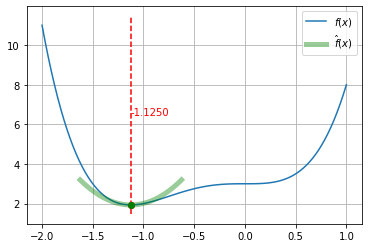

In [2]:
def f(x):
    return 2 * x**4 + 3 * x**3 + 3

def df(x): 
    return 8 * x**3 + 9 * x**2

def ddf(x):
    return 24 * x**2 + 18*x

x = -2  # our initial guess

def taylorf(x,dx):
    return f(x) + df(x) * dx + 0.5 * ddf(x) * dx**2

x = np.random.uniform(-2, 1)  # first guess at minimum

xs = np.linspace(-2, 1, num=100)

fig = plt.figure()

dxs = np.linspace(-0.5, 0.5, num=100)

for rep in range(10):
    time.sleep(0.5) # sleep 2 seconds
    plt.clf()
    plt.plot(xs, f(xs))
    plt.grid('on')
    plt.plot(x + dxs, taylorf(x, dxs), 'g-', linewidth=5, alpha=0.4)
    plt.plot(x, f(x), 'ro')         
    y0,y1 = plt.ylim()
    plt.plot([x, x], [y0, y1], 'r--')
    
    x = x - df(x) / float(ddf(x))
    plt.plot(x, f(x), 'go')
    plt.text(x, (y0 + y1) * 0.5, f'{x:.4f}', color='r')
    plt.legend(('$f(x)$','$\hat{f}(x)$'))
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True)

This has all been for a function $f(x)$ of a single, scalar variable
$x$.  To minimize a squared error function for a neural network, $x$
will consist of all the weights of the neural network.  If all of the
weights are collected into the vector $\wv$, then the first derivative
of the squared error function, $f$, with respect to the weight vector,
$\wv$, is a vector of derivatives like $\frac{\partial f}{\partial
w_{i}}$.  This is usually written as the gradient

$$
\nabla_{\wv} f =
(\frac{\partial f}{\partial w_{1}}, \frac{\partial f}{\partial w_{2}},
\ldots, \frac{\partial f}{\partial w_{n}}).
$$

The second derivative will be $n\times n$ matrix of values like
$\frac{\partial^2 f}{\partial w_i \partial w_j}$, usually
written as the Hessian

$$
\nabla^2_{\wv} f =
\begin{pmatrix}
\frac{\partial^2 f}{\partial w_1 \partial w_1} & 
\frac{\partial^2 f}{\partial w_1 \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_1 \partial w_n}\\
\frac{\partial^2 f}{\partial w_2 \partial w_1} & 
\frac{\partial^2 f}{\partial w_2 \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_2 \partial w_n}\\
\vdots \\
\frac{\partial^2 f}{\partial w_n \partial w_1} & 
\frac{\partial^2 f}{\partial w_n \partial w_2} & 
\cdots
\frac{\partial^2 f}{\partial w_n \partial w_n}
\end{pmatrix}
$$

It is often impractical to
construct and use the Hessian.  We
will consider ways to approximate the product of the Hessian and a
matrix as part of the Scaled Conjugate Gradient algorithm.

### The Conjugate Part

Let $E(\wv)$ be the error function (mean square error over training samples) we wish to minimize by
findig the best $\wv$. Steepest descent will find new $\wv$ by
minimizing $E(\wv)$ in successive directions $\dv_0, \dv_1, \ldots$
for which $\dv_i^T \dv_j = 0$ for $i \neq j$.  In other words, the
search directions are orthogonal to each other, resulting in a zig-zag
pattern of steps, some of which are in the same directions.  

Another problem with orthogonal directions is that forcing the second
direction, for example, to be orthogonal to the first will not be in
the direction of the minimum unless the error function is quadratic
and its contours are circles.

We would rather choose a new direction based on the previous ones and
on the curvature, or second derivative, of the error function at the
current $\wv$.  This is the idea behind conjugate gradient methods.

The Scaled Conjugate Gradient (SCG) algorithm,
[Efficient
Training of Feed-Forward Neural Networks, by Moller](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.50.8063&rep=rep1&type=pdf), combines conjugate gradient directions with a local, quadratic approximation to the error function and solving
for the new value of $\wv$ that would minimize the quadratic function.
A number of additional steps are taken to improve the quadratic
approximation.

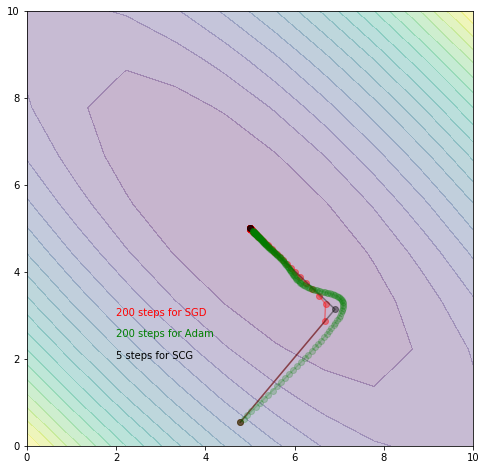

In [6]:
import optimizers as opt

def parabola(x, xmin, s):
    d = x - xmin
    return d.T @ s @ d

def parabolaGrad(x, xmin, s):
    d = x - xmin
    return 2 * (s @ d)

f = parabola
df = parabolaGrad
center = np.array([5, 5]).reshape(2, 1)
S = np.array([[5, 4], [4, 5]])

n = 10
xs = np.linspace(0, 10, n)
ys = np.linspace(0, 10, n)
X,Y = np.meshgrid(xs, ys)
both = np.vstack((X.flat, Y.flat)).T
nall = n * n
Z = np.zeros(nall)
for i in range(n * n):
    Z[i] = parabola(both[i:i + 1, :].T, center, S)
Z.resize((n, n))

fig = plt.figure(figsize=(8, 8))

for reps in range(10):
    time.sleep(2)
    
    firstx = np.random.uniform(0, 10, (2, 1))

    result_scg = opt.scg(firstx, f, df, [center, S], n_iterations=200, save_wtrace=True)    
    result_sgd = opt.sgd(firstx, f, df, [center, S], n_iterations=200,
                         learning_rate=0.05, momentum_rate=0, save_wtrace=True)
    result_adam = opt.adam(firstx, f, df, [center, S], n_iterations=200,
                           learning_rate=0.1, save_wtrace=True)

    plt.clf()
    plt.contourf(X, Y, Z, 20, alpha=0.3)
    plt.axis('tight')
    
    xt = result_sgd['wtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'ro-', alpha=0.4)

    xt = result_scg['wtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'ko-', alpha=0.4)

    xt = result_adam['wtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'go-', alpha=0.2)

    plt.text(2, 3, f"{result_sgd['wtrace'].shape[0]} steps for SGD", color='red')
    plt.text(2, 2., f"{result_scg['wtrace'].shape[0]} steps for SCG", color='black')
    plt.text(2, 2.5, f"{result_adam['wtrace'].shape[0]} steps for Adam", color='green')
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
             
ipd.clear_output(wait=True) 

Rosenbrock's function is often used to test optimization algorithms.
It is

$$
f(x,y) = (1-x)^2 + 100(y-x^2)^2
$$

In [7]:
def rosen(x):
    v = 100 * ((x[1] - x[0]**2)**2) + (1.0 - x[0])**2
    return v

def rosenGrad(x):
    g1 = -400 * (x[1] - x[0]**2) * x[0] - 2 * (1 - x[0])
    g2 =  200 * (x[1] - x[0]**2)
    return np.array([g1, g2]).reshape((2, 1))

f = rosen
df = rosenGrad

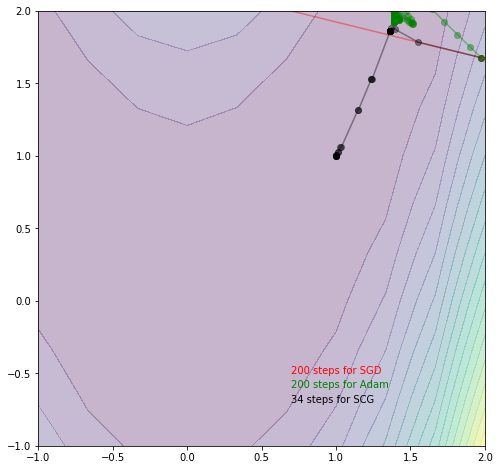

In [12]:
n = 10
xmin, xmax = -1,2
xs = np.linspace(xmin, xmax, n)
ys = np.linspace(xmin, xmax, n)
X, Y = np.meshgrid(xs, ys)
both = np.vstack((X.flat, Y.flat)).T
nall = n * n
Z = np.zeros(nall)
for i in range(n * n):
    Z[i] = f(both[i, :])
Z.resize((n, n))

fig = plt.figure(figsize=(8, 8))

for reps in range(10):
    time.sleep(2)
    
    firstx = np.random.uniform(xmin, xmax, (2, 1))

    result_scg = opt.scg(firstx, f, df, n_iterations=200, save_wtrace=True)    
    result_sgd = opt.sgd(firstx, f, df, n_iterations=200,
                          learning_rate=1e-3, momentum_rate=0.8, save_wtrace=True)
    result_adam = opt.adam(firstx, f, df, n_iterations=200,
                          learning_rate=1e-1, save_wtrace=True)

    plt.clf()
    plt.contourf(X, Y, Z, 20, alpha=0.3)
    plt.axis('tight')
    
    xt = result_sgd['wtrace']
    plt.plot(xt[: ,0], xt[:, 1], 'ro-', alpha=0.4)

    xt = result_scg['wtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'ko-', alpha=0.4)

    xt = result_adam['wtrace']
    plt.plot(xt[:, 0], xt[:, 1], 'go-', alpha=0.4)

    plt.text(0.7, -0.5, f"{result_sgd['wtrace'].shape[0]} steps for SGD", color='red')
    plt.text(0.7, -0.7, f"{result_scg['wtrace'].shape[0]} steps for SCG", color='black')
    plt.text(0.7, -0.6, f"{result_adam['wtrace'].shape[0]} steps for Adam", color='green')
    
    ipd.clear_output(wait=True)
    ipd.display(fig)
ipd.clear_output(wait=True) 